In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_full = pd.read_csv('../reports/final/result_df_conv.csv')
df_full['name'] = df_full.T.apply(lambda row: '_'.join([str(x) for x in row.drop(['num', 'smape', 'mase*'])]))
print(df_full.shape)

# Keep ensembles
df = df_full[df_full['num'].isna()].dropna(axis=1)
print(df.shape)

# Filter out duplicates (usually errors)
df = df[~df['name'].duplicated(keep='first')]
print(df.shape)

(2806, 15)
(46, 14)
(46, 14)


In [33]:
df['name']

60      12_12_0.95_mae_700_relu_conv4_5_adam_0.001_False
121     12_16_0.95_mae_700_relu_conv4_5_adam_0.001_False
182     12_18_0.95_mae_700_relu_conv4_5_adam_0.001_False
243     12_14_0.95_mae_700_relu_conv4_5_adam_0.001_False
304      12_6_0.95_mae_700_relu_conv4_5_adam_0.001_False
365     12_10_0.95_mae_700_relu_conv4_5_adam_0.001_False
426      12_8_0.95_mae_700_relu_conv4_5_adam_0.001_False
487     18_20_0.95_mae_700_relu_conv4_5_adam_0.001_False
548     18_22_0.95_mae_700_relu_conv4_5_adam_0.001_False
609      18_6_0.95_mae_700_relu_conv4_5_adam_0.001_False
670     18_18_0.95_mae_700_relu_conv4_5_adam_0.001_False
731     18_12_0.95_mae_700_relu_conv4_5_adam_0.001_False
792     18_14_0.95_mae_700_relu_conv4_5_adam_0.001_False
853     18_24_0.95_mae_700_relu_conv4_5_adam_0.001_False
914     18_16_0.95_mae_700_relu_conv4_5_adam_0.001_False
975     18_10_0.95_mae_700_relu_conv4_5_adam_0.001_False
1036     18_8_0.95_mae_700_relu_conv4_5_adam_0.001_False
1097    24_30_0.95_mae_700_relu

In [4]:
def add_benchmarks(legend_loc=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 350.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 350.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc=legend_loc)
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

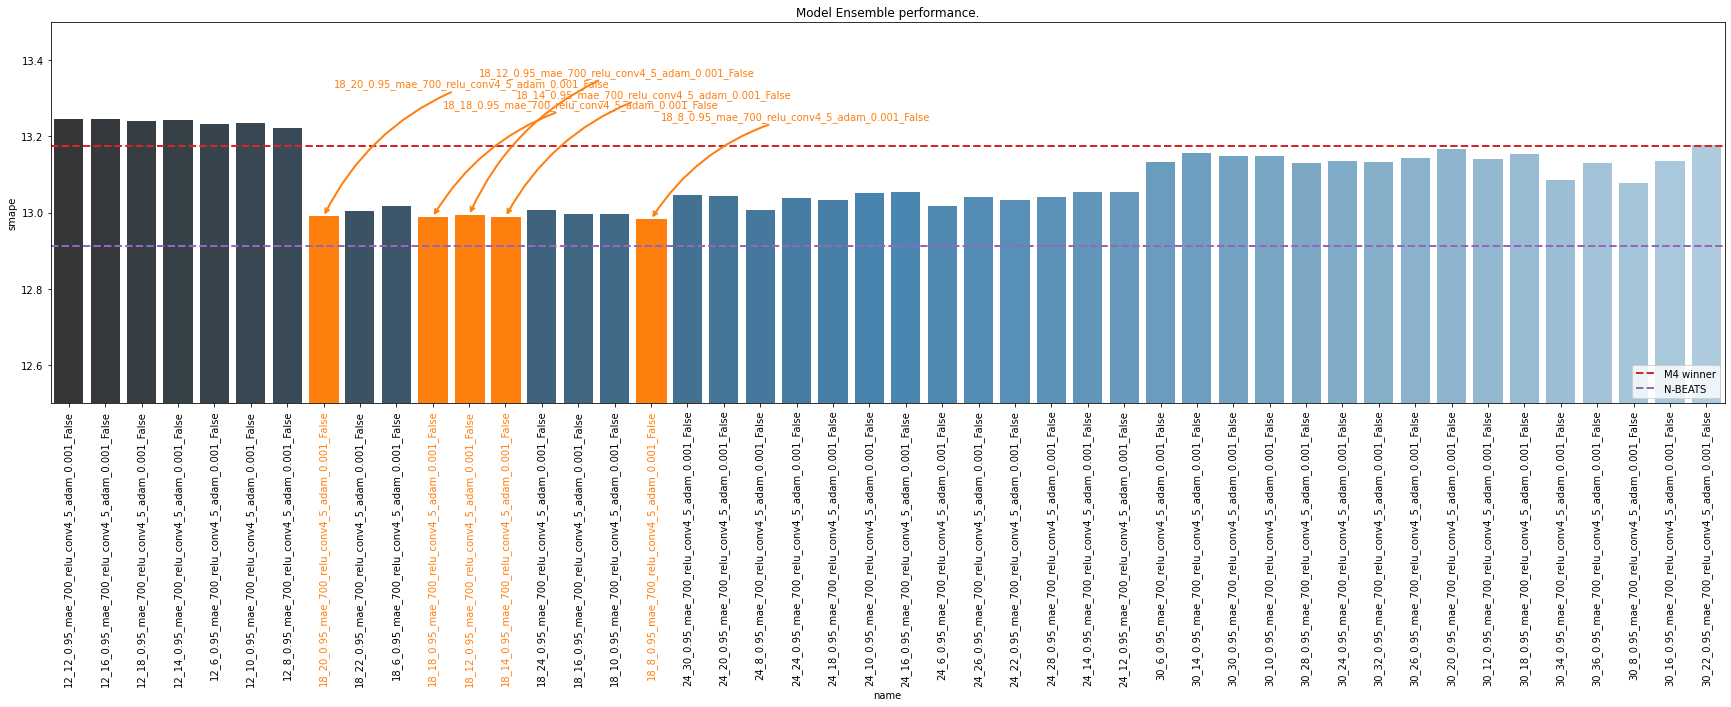

In [5]:
plt.figure(figsize=(30, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

[bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
[label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks(legend_loc='lower right')

## Show best

In [6]:
df.sort_values(by='smape').head()

,input_len,output_len,aug,loss,bottleneck_size,bottleneck_activation,model_type,kernel_size,optimizer,learning_rate,line,smape,mase*,name
1036,18,8,0.95,mae,700,relu,conv4,5,adam,0.001,False,12.982431,2.657367,18_8_0.95_mae_700_relu_conv4_5_adam_0.001_False
670,18,18,0.95,mae,700,relu,conv4,5,adam,0.001,False,12.988253,2.660152,18_18_0.95_mae_700_relu_conv4_5_adam_0.001_False
792,18,14,0.95,mae,700,relu,conv4,5,adam,0.001,False,12.988893,2.659909,18_14_0.95_mae_700_relu_conv4_5_adam_0.001_False
487,18,20,0.95,mae,700,relu,conv4,5,adam,0.001,False,12.989705,2.659809,18_20_0.95_mae_700_relu_conv4_5_adam_0.001_False
731,18,12,0.95,mae,700,relu,conv4,5,adam,0.001,False,12.993887,2.660277,18_12_0.95_mae_700_relu_conv4_5_adam_0.001_False


## Input length

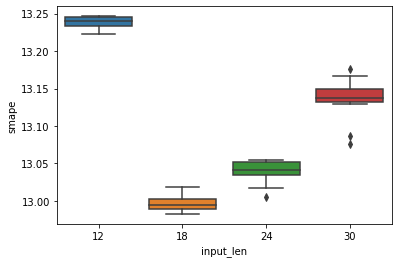

In [7]:
sns.boxplot(x='input_len', y='smape', data=df)

(12.8, 13.4)

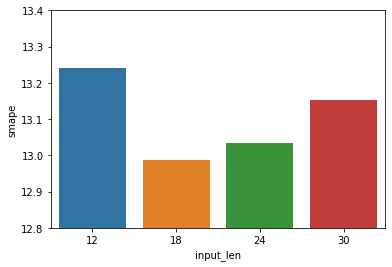

In [14]:
sns.barplot(x='input_len', y='smape', data=df[df['output_len'] == 18])
plt.ylim([12.8, 13.4])

## Output length

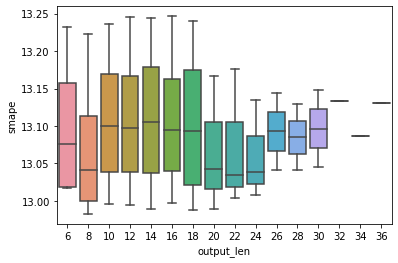

In [22]:
sns.boxplot(x='output_len', y='smape', data=df)

(12.95, 13.05)

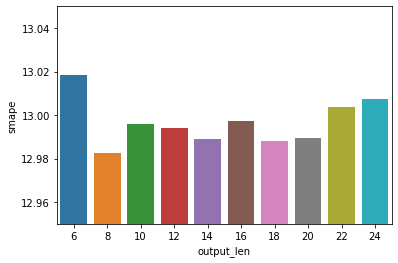

In [21]:
sns.barplot(x='output_len', y='smape', data=df[df['input_len'] == 18])
plt.ylim([12.95, 13.05])

## Investigate warm/cold reststarts

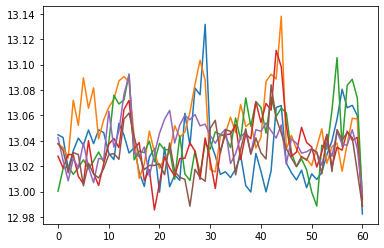

In [31]:
n1 = '18_8_0.95_mae_700_relu_conv4_5_adam_0.001_False'
n2 = '18_10_0.95_mae_700_relu_conv4_5_adam_0.001_False'
n3 = '18_12_0.95_mae_700_relu_conv4_5_adam_0.001_False'
n4 = '18_14_0.95_mae_700_relu_conv4_5_adam_0.001_False'
n5 = '18_16_0.95_mae_700_relu_conv4_5_adam_0.001_False'
n6 = '18_18_0.95_mae_700_relu_conv4_5_adam_0.001_False'

x = len(df_full[df_full['name'] == n1])

plt.plot(range(x), df_full[df_full['name'] == n1]['smape'])
plt.plot(range(x), df_full[df_full['name'] == n2]['smape'])
plt.plot(range(x), df_full[df_full['name'] == n3]['smape'])
plt.plot(range(x), df_full[df_full['name'] == n4]['smape'])
plt.plot(range(x), df_full[df_full['name'] == n5]['smape'])
plt.plot(range(x), df_full[df_full['name'] == n6]['smape'])